In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

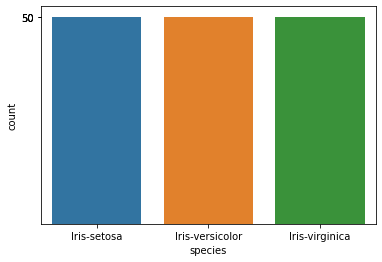

In [6]:
#visualize 
sns.countplot(data=df, x='species')
f=df['species'].value_counts()
plt.yticks(f)
plt.show()

In [7]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [8]:
#remove duplicates later

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
#apply labelEncoder on species 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


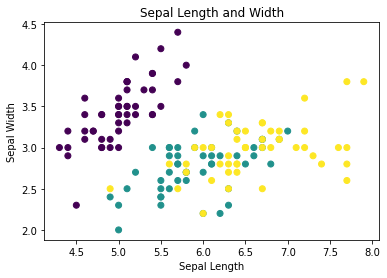

In [15]:
#we only want to take 2 inputs at first
X=df.iloc[:, :2]                # ':' means here all rows and ':2' means first 2 columns (sepal lengt and width)

Y=df['species']

#draw scatterplot
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=Y)   #c means color 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length and Width')
plt.show()

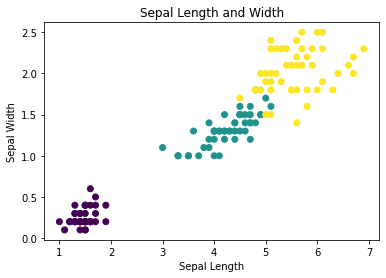

In [16]:
#now we will take the other 2 remaining rows
X=df.iloc[:, 2:4]                # ':' means here all rows and '2:4' means 3rd and 4th columns (petal lengt and width)

Y=df['species']

#draw scatterplot
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=Y)   #c means color 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length and Width')
plt.show()

In [17]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [18]:
#select input and output
X=df.drop('species', axis=1)
Y=df['species']

In [19]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
#apply train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1, stratify=Y)
#stratify is the pass output vaiable for multiclass classifier

In [21]:
X_train.shape, X_test.shape

((102, 4), (45, 4))

In [22]:
Y_train.shape, Y_test.shape

((102,), (45,))

In [23]:
Y_train.value_counts()

1    35
2    34
0    33
Name: species, dtype: int64

In [24]:
Y_test.value_counts()

2    15
0    15
1    15
Name: species, dtype: int64

In [25]:
#Perform scaling on training and testing data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [26]:
#import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
#create a function
def create_model(model):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print(confusion_matrix(Y_test, Y_pred))
    return model

In [29]:
#Apply Support Vector Machine (SVM)
#SVM : Support vector machine 
#There are different types of SVM : -
'''
1. Linear Separatable data means Linear Kernal function
2.  Non -Linear data
1. Polynomial Kernal function    2. radial basis kernel function
'''

'\n1. Linear Separatable data means Linear Kernal function\n2.  Non -Linear data\n1. Polynomial Kernal function    2. radial basis kernel function\n'

In [30]:
#1. Linear Separable data means Linear Kernal
from sklearn.svm import LinearSVC 
svc=LinearSVC(random_state=1) #by default hard margin, supposing there are no outliers in dataset
#we are supposing that there is no overfitting issue

In [31]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [32]:
#here recall is 0.93 of 2 category which is good but we can go for a better score

#Soft margin means to reduced overfitting situation means some error add on training time 
#create object of LinearSVC class
#Soft Margin

In [33]:
svc1=LinearSVC(random_state=1, C=0.9) #soft margin

#here C is parameter which is used to add some error during training

In [34]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [35]:
#no effect on recall score when error is increased or decreased means we conclude

#In polynomial Kernal function, increase the dimension means to increase low dimension to high dimension

In [36]:
# Use polynomial kernal function
from sklearn.svm import SVC

#svc used for polynomial and radial based kernal functions: both are used for non-linear function

In [37]:
#create object of SVC class and pass the poly in kernal parameter
svc1=SVC(random_state=1, kernel='poly')

In [38]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [39]:
#score has dropped to 73% which is not good
#so give dataset in radial based function=rbf
svc2=SVC(random_state=1, kernel='rbf')

In [40]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [ ]:
#Conclusion: Iris dataset is non-linear
#Data is radial and therefore we have found the highest score through radial kernel function of SVM